In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = "/Users/lovhag/Projects/dl4nlp_assignment_1/a1_data/wsd_train.txt"

In [3]:
data = pd.read_table(filename,header=None,names=['sense_key', 'lemma', 'word_position', 'text'])
data.head()

,sense_key,lemma,word_position,text
0,keep%2:42:07::,keep.v,15,Action by the Committee In pursuance of its ma...
1,national%3:01:00::,national.a,25,A guard of honour stood in formation in honour...
2,build%2:31:03::,build.v,38,The principle that statistics should be timely...
3,place%1:04:00::,place.n,36,"Again , he appealed for additional support for..."
4,position%1:04:01::,position.n,76,"Also , the IAEA has the lowest number of women..."


In [4]:
data.iloc[0].text

'Action by the Committee In pursuance of its mandate , the Committee will continue to keep under review the situation relating to the question of Palestine and participate in relevant meetings of the General Assembly and the Security Council . The Committee will also continue to monitor the situation on the ground and draw the attention of the international community to urgent developments in the Occupied Palestinian Territory , including East Jerusalem , requiring international action .'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76049 entries, 0 to 76048
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sense_key      76049 non-null  object
 1   lemma          76049 non-null  object
 2   word_position  76049 non-null  int64 
 3   text           76049 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## Encode the sense keys per lemma

In [6]:
data['num_sense_key'] = [0]*len(data)

sense_key_dict_per_lemma = {}
for index, row in data.iterrows():
    if row.lemma not in sense_key_dict_per_lemma:
        sense_key_dict_per_lemma[row.lemma] = {}
    if row.sense_key not in sense_key_dict_per_lemma[row.lemma]:
        curr_len = len(sense_key_dict_per_lemma[row.lemma])
        sense_key_dict_per_lemma[row.lemma][row.sense_key] = curr_len+1
    data.at[index,'num_sense_key'] = sense_key_dict_per_lemma[row.lemma][row.sense_key]

In [7]:
data.head(20)

,sense_key,lemma,word_position,text,num_sense_key
0,keep%2:42:07::,keep.v,15,Action by the Committee In pursuance of its ma...,1
1,national%3:01:00::,national.a,25,A guard of honour stood in formation in honour...,1
2,build%2:31:03::,build.v,38,The principle that statistics should be timely...,1
3,place%1:04:00::,place.n,36,"Again , he appealed for additional support for...",1
4,position%1:04:01::,position.n,76,"Also , the IAEA has the lowest number of women...",1
5,position%1:04:01::,position.n,70,C Evolution of the margin Recalling section I....,1
6,serve%2:41:02::,serve.v,44,"Thus , attention to equality issues is not con...",1
7,national%3:00:01::,national.a,39,( c ) The implementation of a national system ...,2
8,hold%2:31:01::,hold.v,24,The relevant divergent views can be summed up ...,1
9,line%1:04:01::,line.n,57,The amendment would take into account the spec...,1


In [8]:
data.describe()

,word_position,num_sense_key
count,76049.000000,76049.000000
mean,48.948546,3.307144
std,23.835883,2.115721
min,0.000000,1.000000
25%,32.000000,1.000000
50%,45.000000,3.000000
75%,62.000000,5.000000
max,188.000000,11.000000


In [9]:
save_to_file = input("Specify the filename to which you wish to save 'data': ")
data.to_csv(save_to_file)

FileNotFoundError: [Errno 2] No such file or directory: ''

# OBJECTIVE: Choose the correct sense key for a sentence

## Data visualization

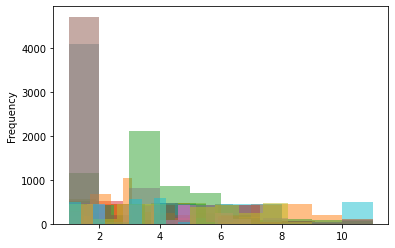

In [25]:
data.groupby(['lemma']).num_sense_key.plot(kind='hist', alpha=0.5)
plt.show()

In [10]:
data_sense_per_lemma = data.groupby(['lemma','sense_key']).text.count().reset_index().rename(columns={'text': 'text_count'})
data_sense_per_lemma.describe()

,text_count
count,222.000000
mean,342.563063
std,455.149782
min,22.000000
25%,91.250000
50%,425.000000
75%,436.750000
max,4720.000000


In [12]:
data_sense_per_lemma[data_sense_per_lemma.text_count == 22]

,lemma,sense_key,text_count
71,follow.v,follow%2:42:05::,22
96,keep.v,keep%2:40:09::,22
127,line.n,line%1:14:01::,22
153,place.n,place%1:10:02::,22


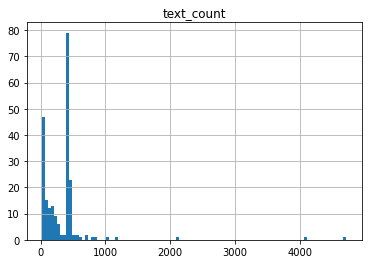

In [44]:
data_sense_per_lemma.hist(bins=100)
plt.show()